# Final Project

Examining the linear relationship between the amount of water a person consumes and the distance they run.

Text(0, 0.5, 'Water Drinks (Litre)')

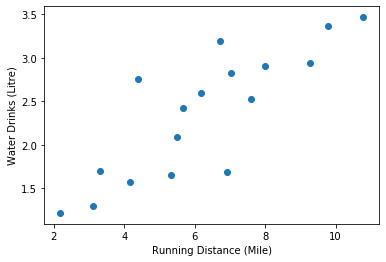

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

## Calculating the Mean Squared Error

The mean squared error calculates the average squared error between the actual and predicted values. This formula helps us determine whether or not the current line is a good model for the data.

In [2]:
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    sum_squared_error = sum([(i-j)**2 for i, j in zip(y_pred, y)])
    N = len(y)
    mse = sum_squared_error/N
    return mse

print(min_sq_error(y, x, 0.7, 0.3))
print(min_sq_error(y, x, 0.25163494, 0.79880123))

6.518593101764703
0.15385767404191164


## Finding the Slope and Intercept to Minimize Mean Squared Error

If we aren't given the optimal slope and intercept, we may need to find the best ones to minimize the mean squared error. You can do so by using partial derivatives. I encorporated epochs to define how many times we want to iterate over the weights to find the smallest possible error. The learning rate defines how much we update the weights during each iteration.

In [3]:
def slope_intercept_LR(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_xy= np.mean([i*j for i,j in zip(x,y)])
   

    N = len(x)
    

    w1 = (mean_xy-((mean_x)*(mean_y)))/((np.mean([i**2 for i in x])-(mean_x**2)))
    w0 = mean_y-(w1*(mean_x))

    return w1, w0

In [4]:
test = slope_intercept_LR(x, y)
print(test)

(0.25163494428355315, 0.7988012261753947)


## Comparing Predicted Values with Actual Values using Optimal Weights

Text(0, 0.5, 'Water Drinks (Litre)')

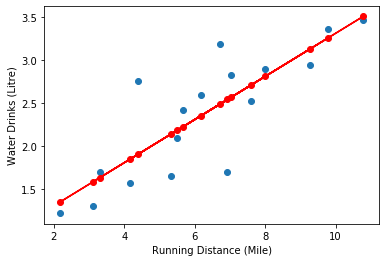

In [5]:
y_pred = [test[0]*i + test[1] for i in x]

plt.scatter(x, y)
plt.plot(x, y_pred, '-ro')
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

## Obtain Variance and Mean of Error

In [6]:
def get_mean_var_E(x, y, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    E = [i - j for i, j in zip(y_pred, y)]
    var = np.var(E)
    mean_e = np.mean(E)
    
    return var, mean_e, E

In [7]:
errs = get_mean_var_E(x, y, slope_intercept_LR(x, y)[0], slope_intercept_LR(x, y)[1])
print(errs)

(0.15385767404191092, 2.481674996220938e-16, [-0.07080345768887986, -0.854005018976971, 0.09279341973493693, -0.7027282976819635, 0.8486313900604179, 0.27461567394924424, -0.10646065367573909, -0.24159154826367946, 0.1787104532875632, 0.12309415043785421, -0.2561854961798238, 0.04919390993921713, 0.4857376851539126, -0.09287412438903075, -0.19845479884539596, 0.19145715968393207, 0.27886955345440945])


## Distribution Plot of Error List

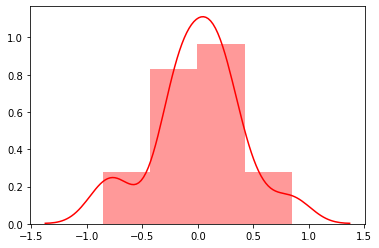

In [8]:
sns.distplot(errs[2], hist=True, kde=True, bins=4, color='red')